<a href="https://colab.research.google.com/github/sidh-singh/StockRegression/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stock Prediction Machine Learning

In [ ]:
!pip install yfinance

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
data = yf.download('EURUSD=X',start='2000-01-01',end='2021-08-05')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,1.203398,1.204007,1.194401,1.196501,1.196501,0
2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0
2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0
2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0
2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0
...,...,...,...,...,...,...
2021-07-30,1.189202,1.191100,1.185550,1.189300,1.189300,0
2021-08-02,1.186535,1.189900,1.185958,1.186704,1.186704,0
2021-08-03,1.187493,1.189600,1.185565,1.187465,1.187465,0


In [ ]:
data.shape

(4565, 6)

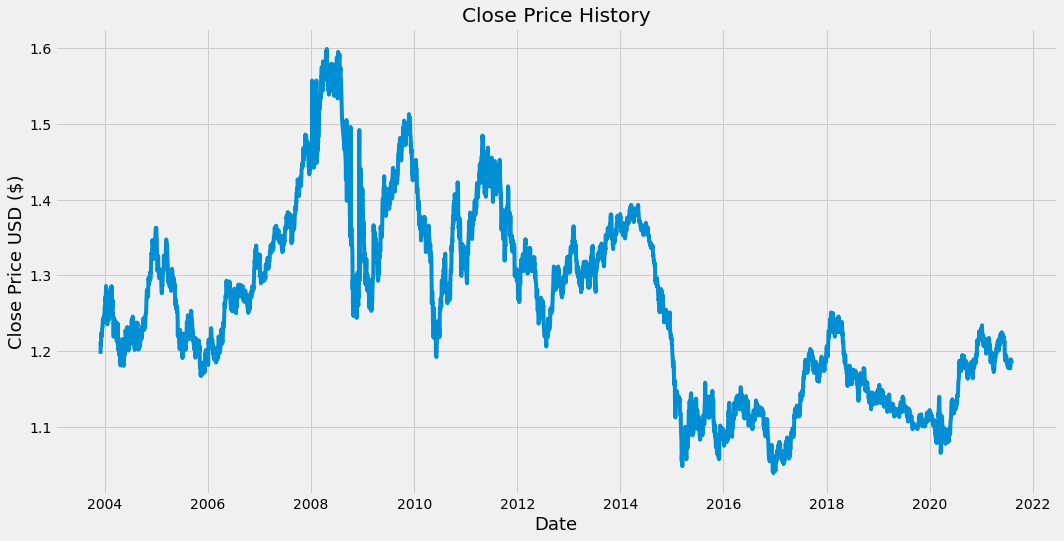

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
df_close = data.filter(['Close'])
close_list = df_close.values
training_data_len = math.ceil(len(close_list) * 0.8)
training_data_len


3652

Scaling the Data

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler_data = scaler.fit_transform(close_list)
scaler_data

array([[0.28129324],
       [0.303439  ],
       [0.30951329],
       ...,
       [0.26514979],
       [0.26421827],
       [0.25849516]])

In [ ]:
train_data = scaler_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(14, len(train_data)):
  x_train.append(train_data[i - 14:i,0])
  y_train.append(train_data[i,0])
  if i <= 15:
    print(x_train)
    print(y_train)
    print()

[array([0.28129324, 0.303439  , 0.30951329, 0.30200401, 0.32094182,
       0.32684851, 0.332197  , 0.32165868, 0.32756898, 0.33738322,
       0.34470742, 0.34505988, 0.35936563, 0.36310898])]
[0.3563195355920643]

[array([0.28129324, 0.303439  , 0.30951329, 0.30200401, 0.32094182,
       0.32684851, 0.332197  , 0.32165868, 0.32756898, 0.33738322,
       0.34470742, 0.34505988, 0.35936563, 0.36310898]), array([0.303439  , 0.30951329, 0.30200401, 0.32094182, 0.32684851,
       0.332197  , 0.32165868, 0.32756898, 0.33738322, 0.34470742,
       0.34505988, 0.35936563, 0.36310898, 0.35631954])]
[0.3563195355920643, 0.3588161669605989]



In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(3638, 14, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences= True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
364/364 [==============================] - 9s 15ms/step - loss: 0.0035
Epoch 2/10
364/364 [==============================] - 5s 14ms/step - loss: 0.0010
Epoch 3/10
364/364 [==============================] - 5s 15ms/step - loss: 9.2902e-04
Epoch 4/10
364/364 [==============================] - 5s 14ms/step - loss: 7.4101e-04
Epoch 5/10
364/364 [==============================] - 5s 14ms/step - loss: 6.4810e-04
Epoch 6/10
364/364 [==============================] - 5s 14ms/step - loss: 5.4856e-04
Epoch 7/10
364/364 [==============================] - 5s 14ms/step - loss: 5.4502e-04
Epoch 8/10
364/364 [==============================] - 5s 14ms/step - loss: 4.9054e-04
Epoch 9/10
364/364 [==============================] - 5s 14ms/step - loss: 4.9413e-04
Epoch 10/10
364/364 [==============================] - 5s 14ms/step - loss: 4.5502e-04


In [ ]:
test_data = scaler_data[training_data_len - 14: , : ]
x_test = []
y_test = close_list[training_data_len:, :]
for i in range(14, len(test_data)):
  x_test.append(test_data[i - 14:i, 0])


In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))
x_test.shape

(913, 14, 1)

In [ ]:
prediction = model.predict(x_test)
prediction = scaler.inverse_transform(prediction)

In [ ]:
rmse = np.sqrt(np.mean(prediction - y_test)**2)
rmse

0.0032296370049818193

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


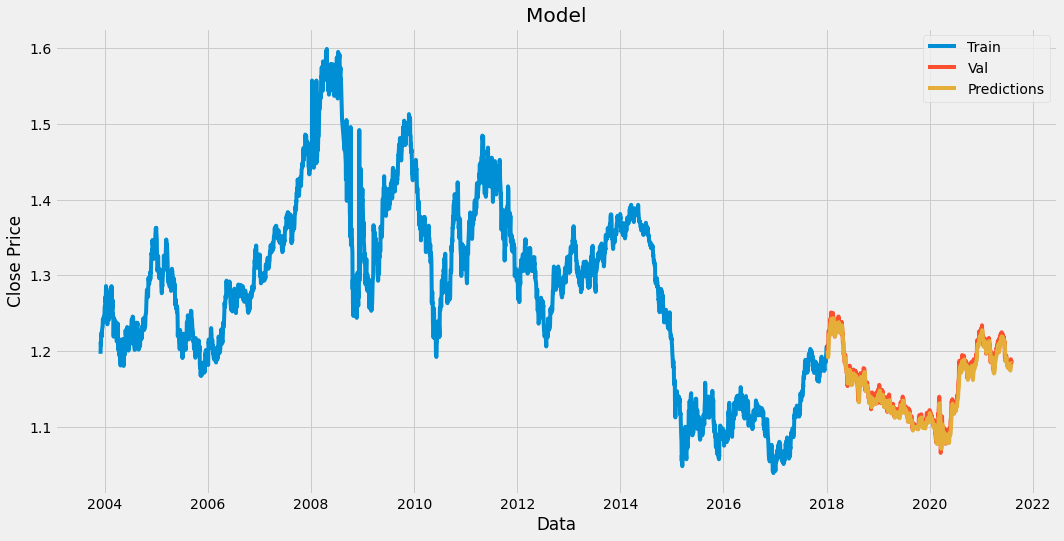

In [ ]:
train = data[:training_data_len]['Close']
valid = data[training_data_len:]['Close']
valid['Predictions'] = prediction

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data')
plt.ylabel('Close Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()

In [ ]:
valid.tail(30)

,Open,High,Low,Close,Adj Close,Volume,Predictions
Date,,,,,,,
2021-06-25,1.192791,1.197447,1.192791,1.193033,1.193033,0,1.189504
2021-06-28,1.194215,1.194600,1.190462,1.194215,1.194215,0,1.190061
2021-06-29,1.193033,1.193033,1.188044,1.192890,1.192890,0,1.190773
2021-06-30,1.189994,1.191043,1.184582,1.190193,1.190193,0,1.190535
2021-07-01,1.185536,1.188399,1.183810,1.185677,1.185677,0,1.188935
2021-07-02,1.184708,1.186099,1.181935,1.184624,1.184624,0,1.185691
2021-07-05,1.185593,1.188200,1.185201,1.185621,1.185621,0,1.183101
2021-07-06,1.186150,1.189626,1.181500,1.186380,1.186380,0,1.182209
2021-07-07,1.182033,1.184133,1.178245,1.182452,1.182452,0,1.182381


In [ ]:
last_60_days = df_close[-14:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[1.1822144]]
